<h2>Project Introduction</h2>

<p>On April 15, 1912, the Titanic ship struck an iceberg and sank which resulted in the deaths of most of its crew and passengers.</p>

<p> In this project, we will make some analysis on the data of the Titanic passengers to determine which features best preidicts which passenger is likely to survive. We will be applying some tools of machine learning to predict which passengers survived the tragedy.</p>

# Import Libraries

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Importing and Exploring the Dataset 

In [260]:
data_set = pd.read_csv('train.csv')
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h2> Variables Descriptions: </h2>
<p><b>Survived:</b> Outcome of Survival (0 = No; 1 = Yes)</p>
<p><b>pclass:</b> Passenger's Class (1 = First Class; 2 = Second Class; 3 = Third Class)</p>
<p><b>Name:</b> Passenger's Name</p>
<p><b>Sex:</b> Passenger's Sex</p>
<p><b>Age:</b> Passenger's Age</p>
<p><b>SibSp:</b> Number of Siblings and Spouses of the Passengers</p>
<p><b>Parch:</b> Number of Parents aand Children of the Passenger</p>
<p><b>Ticket:</b> Passenger's Ticket Number</p>
<p><b>Fare:</b> Passenger's Fare</p>
<p><b>Cabin:</b> Passenger's Cabin Number</p>
<p><b>Embarked:</b> Port of passenger's Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</p>

In [261]:
#Understanding the data set - This gives the first 5 rows in the data

data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [262]:
#Understanding the data set - This gives the last 5 rows in the data

data_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [263]:
#Understanding the data set - This tells how many rows and columns

data_set.shape

(891, 12)

<h2>Creating new features from the dataset:</h2>
<p><b>Title:</b> Reflecting a person's title (Mr, Mrs, Miss, e.t.c) </p>
<p><b>Mother:</b> Reflecting if a person is a mother or not</p>

# New Features: Title

In [264]:
def title(x):
    if "Mr." in x:
        return "Mr"
    
    elif "Mrs." in x:
        return "Mrs"
    
    elif "Master" in x:
        return "Master"
    
    elif "Miss." in x:
        return"Miss"
    
    else:
        return "others"
        

In [265]:
data_set["Title"] = data_set["Name"].apply(title)

#use value_counts() to get count per unique Title value

data_set["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
others     27
Name: Title, dtype: int64

# New feature: Mother

A feature of 'mother' is created if the following features are met:
- The person is female
- The person has more than zero child
- The person is over 18
- The person's title is not 'Miss'

In [266]:
def mother(data):
    if data["Sex"]=="female" and data["Parch"]>0 and data["Age"]>18 and data["Title"]!="Miss":
        return 'Mother'
    else:
        return "Not Mother"

In [267]:
data_set["Mother"]= data_set.apply(mother, axis=1)

#use value_counts() to get count per unique Mother value

data_set["Mother"].value_counts()

Not Mother    839
Mother         52
Name: Mother, dtype: int64

In [268]:
data_set["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
others     27
Name: Title, dtype: int64

In [269]:
#Understanding the data set - viewing the data types of each column

data_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Mother          object
dtype: object

- The "object" type is a string while "int" and "float" are number representations.

In [270]:
#this shows the attributes that have missing values and the total number of missing values present

data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Mother           0
dtype: int64

- The attributes: Age, Cabin, and Embarked have missing values. 
- Cabin has too many missing values, thus, it can be removed from the dataset.
- We might be able to infer values for Age and Embarked.

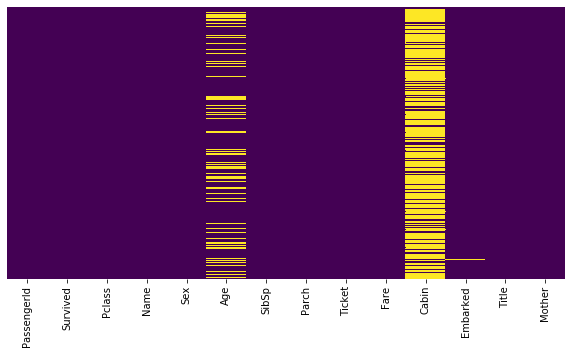

In [271]:
#A clear graphical view of the attributes that has missing values

sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Cleaning the data set to remove unwanted attributes 

In [272]:
#cleaning the data set ---- Removing unwanted attributes

data_set.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [273]:
data_set.shape

(891, 11)

# Attributes Relationships

Text(0.5, 1.0, 'Age Histogram')

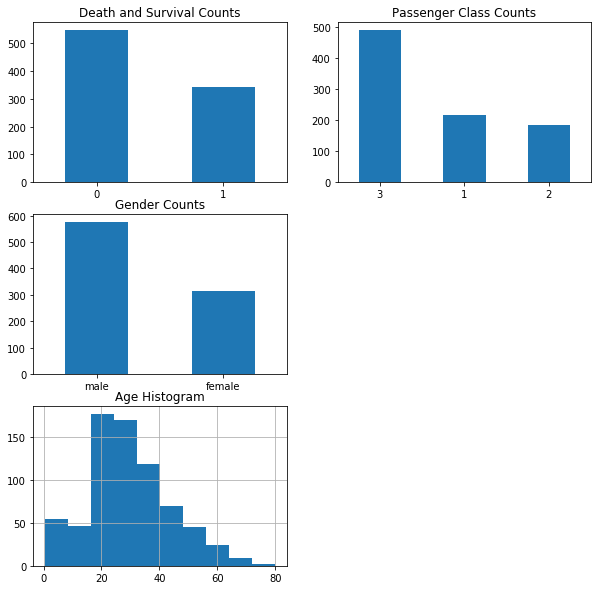

In [274]:
#Plot a few features to get a better idea of each attributes:

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
data_set['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')
plt.xticks(rotation=0)

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
data_set['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')
plt.xticks(rotation=0)

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
data_set['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
data_set['Age'].hist()
plt.title('Age Histogram')

# Exploring Survival Rate Impact on Passenger's Class

In [275]:
#This gives the unique variables in the Pclass attribute

data_set['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [276]:
# We'll determine which proportion of passengers survived based on their passenger class by generating a cross tab of "Pclass" and "Survived"

pclass_CT = pd.crosstab(data_set['Pclass'], data_set['Survived'])
pclass_CT

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

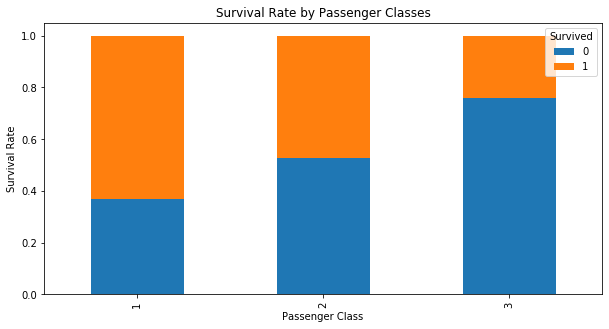

In [277]:
# Normalize the cross tab to sum to 1:
pclass_CT_pct = pclass_CT.div(pclass_CT.sum(1).astype(float), axis=0)

# plotting a normalized cross tab for pclass and survival rate:
pclass_CT_pct.plot(kind='bar', stacked=True, title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

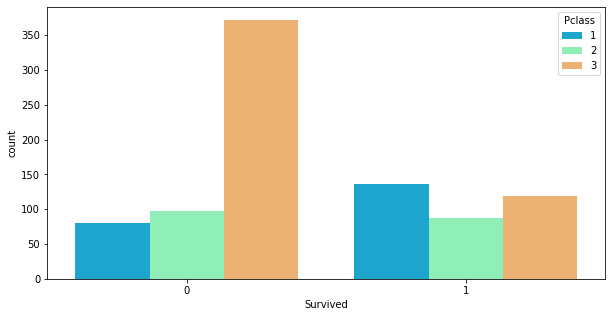

In [278]:
#Another way to graphically represent the relationship between the pclass and the survival rate:

sns.countplot(x='Survived', hue='Pclass', data=data_set, palette='rainbow')

- It is observed that those in First Class has the highest chance for survival.
- Whereas, those in the Third class has the lowest chance of survival.

# Exploring Survival Rate Impact on Passenger's Sex

In [279]:
#This gives the unique variables in the Sex attribute

sexes = sorted(data_set['Sex'].unique())
sexes

['female', 'male']

In [280]:
sex_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
sex_mapping

{'female': 0, 'male': 1}

In [281]:
#transforming sex attribute from a string to a number representative

data_set['Sex_Num'] = data_set['Sex'].map(sex_mapping).astype(int)
data_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Mother,Sex_Num
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,Not Mother,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,Not Mother,0
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,Not Mother,0
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,Not Mother,0
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,Not Mother,1


In [282]:
# We'll determine which proportion of passengers survived based on their sex by generating a cross tab of "sex" and "Survived"

sex_num_CT = pd.crosstab(data_set['Sex_Num'], data_set['Survived'])
sex_num_CT

Survived,0,1
Sex_Num,,
0,81,233
1,468,109


Text(0, 0.5, 'Survival Rate')

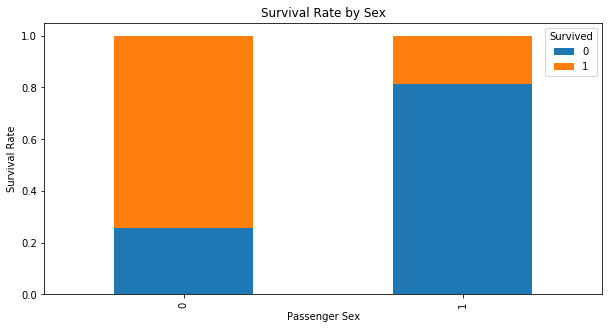

In [283]:
# plotting a normalized cross tab for sex and survival rate:

# Normalize the cross tab to sum to 1:
sex_num_CT_pct = sex_num_CT.div(sex_num_CT.sum(1).astype(float), axis=0)

sex_num_CT_pct.plot(kind='bar', stacked=True, title='Survival Rate by Sex')
plt.xlabel('Passenger Sex')
plt.ylabel('Survival Rate')

- Observation reveals that majority of females survived, whereas the majority of males did not.

# Exploring Survival Rate Impact on Passenger's Age

The Age attribute has some missing values. These missen values have to be filled.

In [284]:

data_set.groupby(['Title'])['Age'].mean()


Title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
others    42.384615
Name: Age, dtype: float64

In [285]:
data_set.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
others    44.5
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

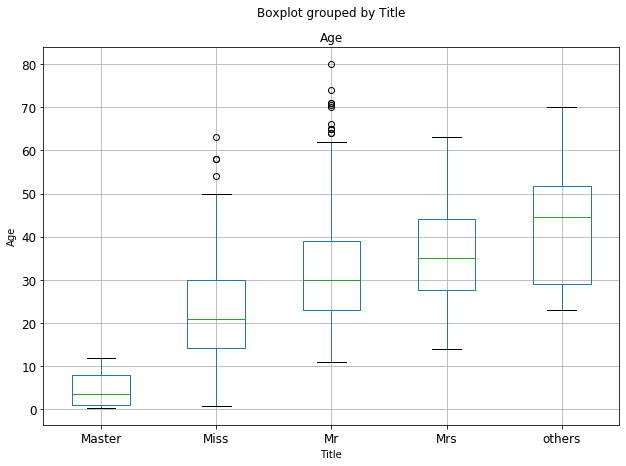

In [286]:
#A boxplot of mean age by different titles

data_set.boxplot(column="Age", by="Title", figsize=(10,7), fontsize=12)
plt.ylabel("Age")

In [287]:
#Fill in the missing values

data_set['Age'].fillna(data_set.groupby(["Title"])["Age"].transform(np.median), inplace=True)

Text(0.5, 0, 'Age')

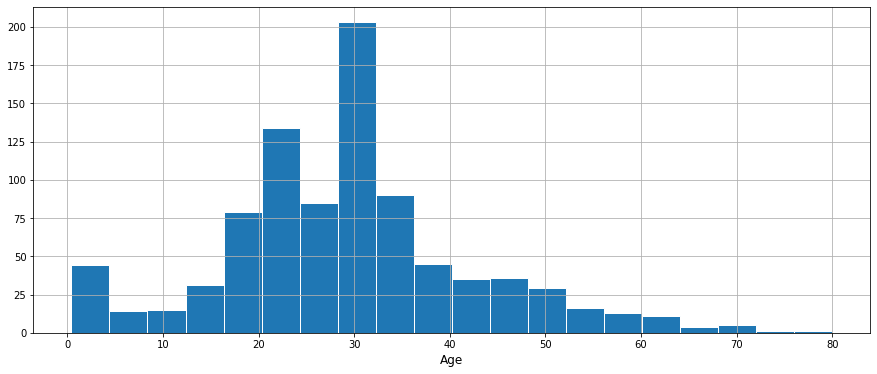

In [288]:
#plot of age distribution

data_set['Age'].hist(bins=20, figsize=(15,6), edgecolor = 'white')
plt.xlabel('Age', fontsize=12)

- <b>Observations</b> from the graph shows that most survivors come from the 20's to 30's age ranges 

# Exploring Survival Rate Impact on Passenger's Embarkment

The Embarked attribute has some missing values. This has to be resolved by inputing the missing values with the most occuring values on the list.

In [289]:
#use value_counts() to get count per unique Embarked value

data_set.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since the vast majority of passengers embarked in 'S', we assign the missing values in Embarked to 'S':

In [290]:
data_set["Embarked"] = data_set["Embarked"].fillna('S')

In [291]:
#use value_counts() to get count per unique Embarked value

data_set.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [292]:
#Verify we do not have any more missing values in the data set:

data_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Mother         0
Sex_Num        0
dtype: int64

Changing Embarked to a number representative:

In [293]:
embarked_mapping = dict(zip(embarked,range(0, len(embarked) + 1)))
embarked_mapping

{'S': 0, 'C': 1, 'Q': 2}

In [294]:
#transforming embarked attribute from a string to a number representative

data_set['Embarked_Num'] = data_set['Embarked'].map(embarked_mapping).astype(int)

Plot a normalized cross tab for Embarked_Num and Survived:

In [295]:
embarked_num_CT = pd.crosstab(data_set['Embarked_Num'], data_set['Survived'])
embarked_num_CT


Survived,0,1
Embarked_Num,,
0,427,219
1,75,93
2,47,30


- Observation shows that those that passengers embarked in location 'S': 0 had the highest rate of survival.

<h3><b>The following attributes are in string (object) and donot have an alternative attribute in integer:</b></h3>

- Mother <br/>
- Title<br/>

This problem will have to be resolved by converting them to number representations.

<h3>'Mother' to number representative</h3>

In [296]:
#This gives the unique variables in the Sex attribute

mother = sorted(data_set['Mother'].unique())
mother

['Mother', 'Not Mother']

In [297]:
mother_mapping = dict(zip(mother, range(0, len(mother) + 1)))
mother_mapping

{'Mother': 0, 'Not Mother': 1}

In [298]:
#transforming mother attribute from a string to a number representative

data_set['Mother_Num'] = data_set['Mother'].map(mother_mapping).astype(int)


<h3>'Title' to number representative</h3>

In [299]:
#This gives the unique variables in the Sex attribute

title = sorted(data_set['Title'].unique())
title

['Master', 'Miss', 'Mr', 'Mrs', 'others']

In [300]:
title_mapping = dict(zip(title,range(0, len(title) + 1)))
title_mapping

{'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'others': 4}

In [301]:
#transforming title attribute from a string to a number representative

data_set['Title_Num'] = data_set['Title'].map(title_mapping).astype(int)

<h2> Data Processing for Machine Learning </h2>
<p> We will be dropping the following attributes:</p>
<p>- Attribtes that has types "object"(string) </p>
<p>- Attribtes 'Age' since we will be using the AgeFill column instead </p>
<p>- Attribtes PassengerId since it won't be used as a feature.</p>

In [302]:
#Show only the columns of type 'object' (strings):

data_set.dtypes[data_set.dtypes.map(lambda x: x == 'object')]

Sex         object
Embarked    object
Title       object
Mother      object
dtype: object

In [304]:
data_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Mother,Sex_Num,Embarked_Num,Mother_Num,Title_Num
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,Not Mother,1,0,1,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,Not Mother,0,1,1,3
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,Not Mother,0,0,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,Not Mother,0,0,1,3
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,Not Mother,1,0,1,2


In [305]:
#Drop the columns we won't use:


data_set = data_set.drop(['PassengerId', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Title','Mother'], axis=1)

In [306]:
data_set.dtypes

Survived          int64
Pclass            int64
Age             float64
Fare            float64
Sex_Num           int32
Embarked_Num      int32
Mother_Num        int32
Title_Num         int32
dtype: object

Converting the data frame to a numpy array:

In [307]:
train_data_set = data_set.values
train_data_set

array([[ 0.,  3., 22., ...,  0.,  1.,  2.],
       [ 1.,  1., 38., ...,  1.,  1.,  3.],
       [ 1.,  3., 26., ...,  0.,  1.,  1.],
       ...,
       [ 0.,  3., 21., ...,  0.,  1.,  1.],
       [ 1.,  1., 26., ...,  1.,  1.,  2.],
       [ 0.,  3., 32., ...,  2.,  1.,  2.]])

<h2> Random Forest Training </h2>

In [308]:
#Creating the random forest object:

clf = RandomForestClassifier(n_estimators=100)

In [309]:
# Fit the training data :

# Training data features, skip the first column 'Survived'
train_features = train_data_set[:, 1:]

# 'Survived' column values
train_target = train_data_set[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.978675645342312'

<h2> Model for Machine Learning</h2>

In [310]:
# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print("________________")
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 7) (891,)
________________
(712, 7) (712,)
(179, 7) (179,)


In [313]:
#Use the new training data to fit the model, predict, and get the accuracy score:

clf = clf.fit(train_x, train_y)

predict_y = clf.predict(test_x)

print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.83


# Classification Report

In [314]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.90      0.86       110
    Survived       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

